## Latent Distribution Two-Graph Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8888)

from graspy.inference import LatentDistributionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline

### Generate a stochastic block model graph

We generate a 2-block stochastic blockmodel (SBM) graph and embed it using Adjacency Spectral Embedding (ASE).

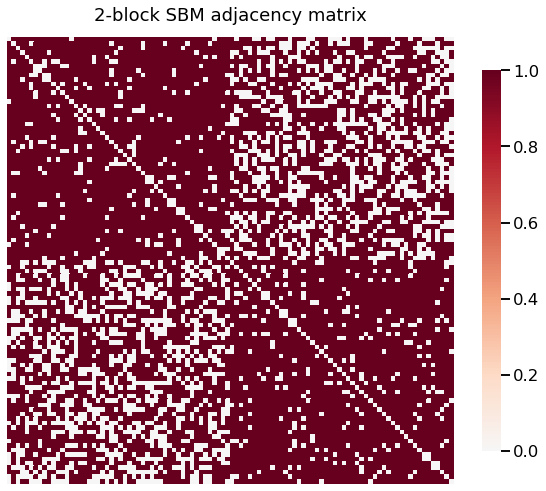

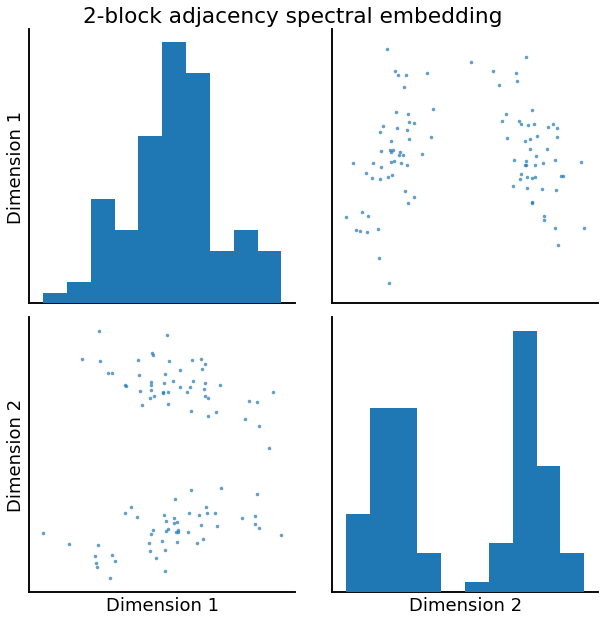

In [2]:
n_components = 2 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.6],
              [0.6, 0.9]])
csize = [50] * 2
A1 = sbm(csize, P)
X1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A1)
heatmap(A1, title='2-block SBM adjacency matrix')
pairplot(X1, title='2-block adjacency spectral embedding', height=4.5)

We generate a second SBM in the same way.

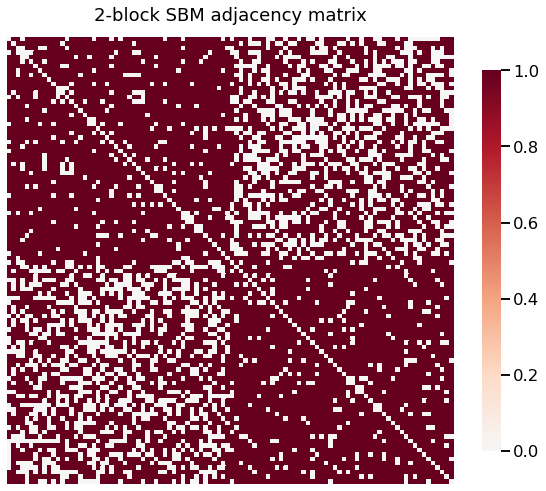

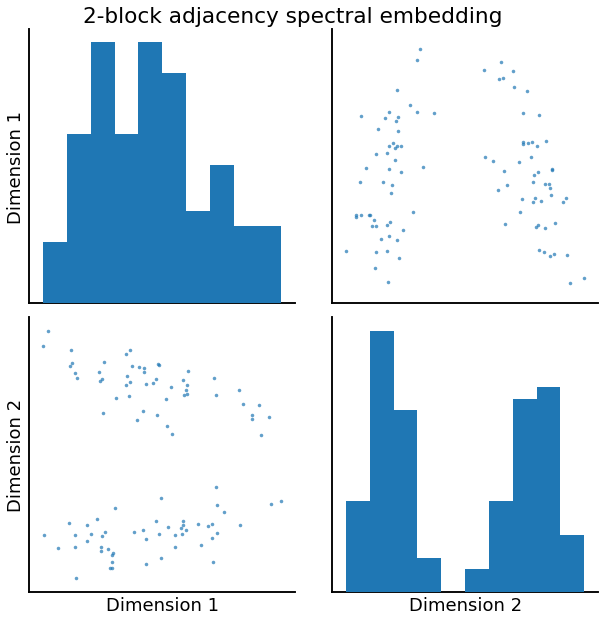

In [3]:
A2 = sbm(csize, P)
X2 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A2)

A1 = sbm(csize, P)
X1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A1)
heatmap(A2, title='2-block SBM adjacency matrix')
pairplot(X2, title='2-block adjacency spectral embedding', height=4.5)

### Latent distribution test where null is true
We want to know whether the latent positions of the two graphs above were generated from the same latent distribution. In other words, we are testing

$$ H_0:F_{X_1} = F_{X_2} R$$$$ H_\alpha: F_{X_1} \neq F_{X_2} R $$ 

The $R$ is an orthogonal rotation matrix present due to the orthogonal non-identifiability in the random dot product graphs.

We know that in this case the graphs were actually generated from the same distribution, so the test should reject no more often than the significance level $\alpha$, and on average the $p$-value should be high (fail to reject the null)

### Plots of Null Distribution for Dcorr and MGC

The class supports the following independence tests documented [here](https://hyppo.neurodata.io/reference/independence.html), as well as any distance function.

We plot the null distribution (blue), test statistic (red), and p-value (title) of the Dcorr and MGC independence tests using euclidean distance.

In [4]:
ldt_dcorr = LatentDistributionTest("dcorr", metric="euclidean", n_bootstraps=100)
ldt_dcorr.fit(A1, A2)

/Users/pauladkisson/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


LatentDistributionTest(input_graph=True, metric=None, n_bootstraps=100,
                       n_components=2, pooled=False, size_correction=True,
                       test=<hyppo.ksample.ksamp.KSample object at 0x1a2cbd2790>,
                       workers=1)

In [5]:
ldt_mgc = LatentDistributionTest("mgc", metric="euclidean", n_bootstraps=100)
ldt_mgc.fit(A1, A2)

/Users/pauladkisson/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


LatentDistributionTest(input_graph=True, metric=None, n_bootstraps=100,
                       n_components=2, pooled=False, size_correction=True,
                       test=<hyppo.ksample.ksamp.KSample object at 0x1a2ed60cd0>,
                       workers=1)

In [6]:
print(ldt_dcorr.p_value_, ldt_mgc.p_value_)

1.0 1.0


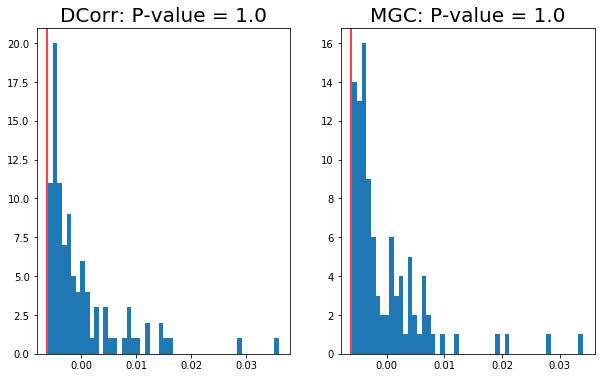

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(ldt_dcorr.null_distribution_, 50)
ax[0].axvline(ldt_dcorr.sample_T_statistic_, color='r')
ax[0].set_title("DCorr: P-value = {}".format(ldt_dcorr.p_value_), fontsize=20)
ax[1].hist(ldt_mgc.null_distribution_, 50)
ax[1].axvline(ldt_mgc.sample_T_statistic_, color='r')
ax[1].set_title("MGC: P-value = {}".format(ldt_mgc.p_value_), fontsize=20)
plt.show();

We see that the test static is small, resulting in p-values above 0.05. Thus, we cannot reject the null hypothesis that the two graphs come from the same generating distributions.

### Latent distribution test where null is false

We generate a third SBM with different interblock probability, and run a latent distribution test comaring the first graph with the new one.

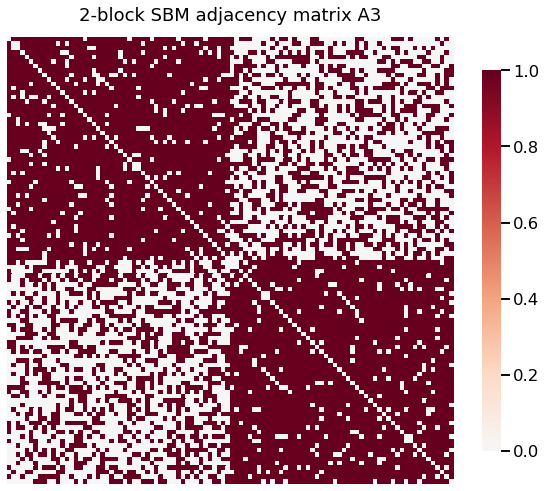

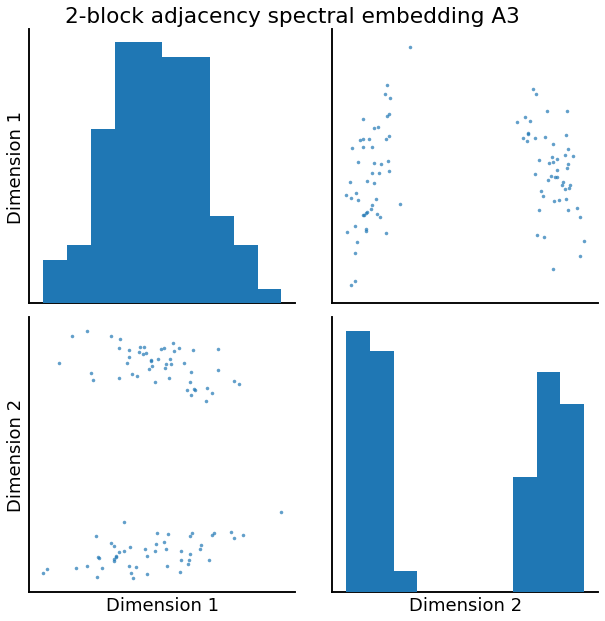

In [8]:
P2 = np.array([[0.9, 0.4],
               [0.4, 0.9]])

A3 = sbm(csize, P2)
heatmap(A3, title='2-block SBM adjacency matrix A3')
X3 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A3)
pairplot(X3, title='2-block adjacency spectral embedding A3', height=4.5)

### Plot of Null Distribution

We plot the null distribution shown in blue and the test statistic shown red vertical line. We see that the test static is small, resulting in p-value of 0. Thus, we reject the null hypothesis that the two graphs come from the same generating distributions.

In [9]:
ldt_dcorr = LatentDistributionTest("dcorr", metric="euclidean", n_bootstraps=100)
ldt_dcorr.fit(A1, A3)

/Users/pauladkisson/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


LatentDistributionTest(input_graph=True, metric=None, n_bootstraps=100,
                       n_components=2, pooled=False, size_correction=True,
                       test=<hyppo.ksample.ksamp.KSample object at 0x1a2e71d850>,
                       workers=1)

In [10]:
ldt_mgc = LatentDistributionTest("mgc", metric="euclidean", n_bootstraps=100)
ldt_mgc.fit(A1, A3)

/Users/pauladkisson/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


LatentDistributionTest(input_graph=True, metric=None, n_bootstraps=100,
                       n_components=2, pooled=False, size_correction=True,
                       test=<hyppo.ksample.ksamp.KSample object at 0x1a2ef80ad0>,
                       workers=1)

In [11]:
print(ldt_dcorr.p_value_, ldt_mgc.p_value_)

0.02 0.01


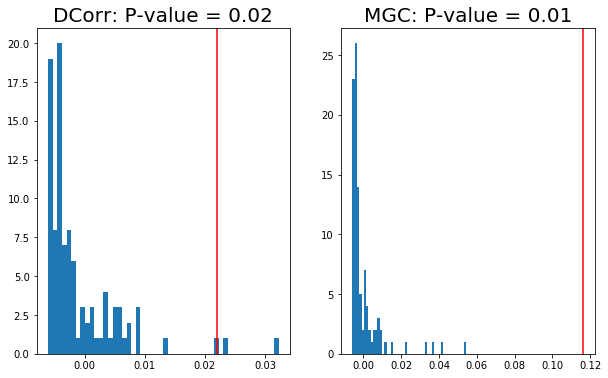

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(ldt_dcorr.null_distribution_, 50)
ax[0].axvline(ldt_dcorr.sample_T_statistic_, color='r')
ax[0].set_title("DCorr: P-value = {}".format(ldt_dcorr.p_value_), fontsize=20)
ax[1].hist(ldt_mgc.null_distribution_, 50)
ax[1].axvline(ldt_mgc.sample_T_statistic_, color='r')
ax[1].set_title("MGC: P-value = {}".format(ldt_mgc.p_value_), fontsize=20)
plt.show();